In [1]:
pip install gpflow tensorflow~=2.15.0 tensorflow-probability~=0.23.0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/380.6 kB ? eta -:--:--
   --------------------------------------- 380.6/380.6 kB 23.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 2.5/300.9 MB 53.6 MB/s eta 0:00:06
    --------------------------------------- 5.4/300.9 MB 58.4 MB/s eta 0:00:06
   - -------------------------------------- 8.4/300.9 MB 59.8 MB/s eta 0:00:05
   - -------------------------------------- 11.4/300.9 MB 65.6 MB/s eta 0:00:05
   - -------------------------------------- 14.4/300.9 MB 59.5 MB/s eta 0:00:05
   -

In [3]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------------------------------- 162.8/162.8 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ------------- -------------------------- 2.6/7.7 MB 56.0 MB/s eta 0:00:01
   ----------------------------- ---------- 5.6/7.7 MB 59.4 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 61.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/188.2 kB ? eta -:--:--
   ---------------------------------------- 188.2/188.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 70.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.1 kB ? eta -:--:--
   ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
   ----------------------------------------

In [4]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

In [5]:
X = np.zeros((0, 1))
Y = np.zeros((0, 1))
model = gpflow.models.GPR((X, Y), gpflow.kernels.SquaredExponential())

In [12]:
def plot_kernel_samples(ax: Axes, kernel: gpflow.kernels.Kernel) -> None:
    X = np.zeros((0, 1))
    Y = np.zeros((0, 1))
    model = gpflow.models.GPR((X, Y), kernel=deepcopy(kernel))
    Xplot = np.linspace(-0.6, 0.6, 100)[:, None]
    tf.random.set_seed(20220903)
    n_samples = 1
    # predict_f_samples draws n_samples examples of the function f, and returns their values at Xplot.
    fs = model.predict_f_samples(Xplot, n_samples)
    ax.plot(Xplot, fs[:, :, 0].numpy().T, label=kernel.__class__.__name__)
    ax.set_ylim(bottom=-2.0, top=2.0)
    ax.set_title("Example $f$s")


def plot_kernel_prediction(
    ax: Axes, kernel: gpflow.kernels.Kernel, *, optimise: bool = True
) -> None:
    X = np.array([[-0.5], [0.0], [0.4], [0.5]])
    Y = np.array([[1.0], [0.0], [0.6], [0.4]])
    model = gpflow.models.GPR(
        (X, Y), kernel=deepcopy(kernel), noise_variance=1e-3
    )

    if optimise:
        gpflow.set_trainable(model.likelihood, False)
        opt = gpflow.optimizers.Scipy()
        opt.minimize(model.training_loss, model.trainable_variables)

    Xplot = np.linspace(-0.6, 0.6, 100)[:, None]

    f_mean, f_var = model.predict_f(Xplot, full_cov=False)
    f_lower = f_mean - 1.96 * np.sqrt(f_var)
    f_upper = f_mean + 1.96 * np.sqrt(f_var)

    ax.scatter(X, Y, color="black")
    (mean_line,) = ax.plot(Xplot, f_mean, "-", label=kernel.__class__.__name__)
    color = mean_line.get_color()
    ax.plot(Xplot, f_lower, lw=0.1, color=color)
    ax.plot(Xplot, f_upper, lw=0.1, color=color)
    ax.fill_between(
        Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color=color, alpha=0.1
    )
    ax.set_ylim(bottom=-1.0, top=2.0)
    ax.set_title("Example data fit")


def plot_kernel(
    kernel: gpflow.kernels.Kernel, *, optimise: bool = True
) -> None:
    _, (samples_ax, prediction_ax) = plt.subplots(nrows=1, ncols=2)
    plot_kernel_samples(samples_ax, kernel)
    plot_kernel_prediction(prediction_ax, kernel, optimise=optimise)

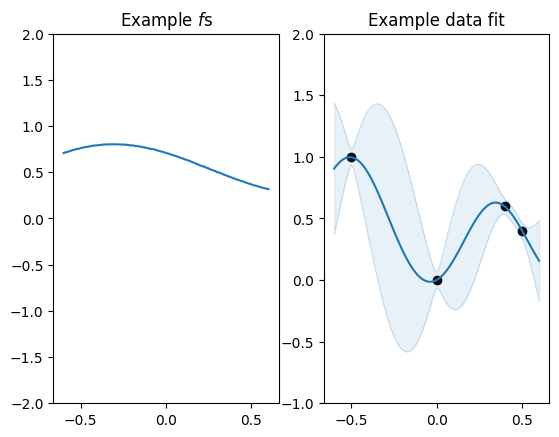

In [13]:
plot_kernel(gpflow.kernels.SquaredExponential())

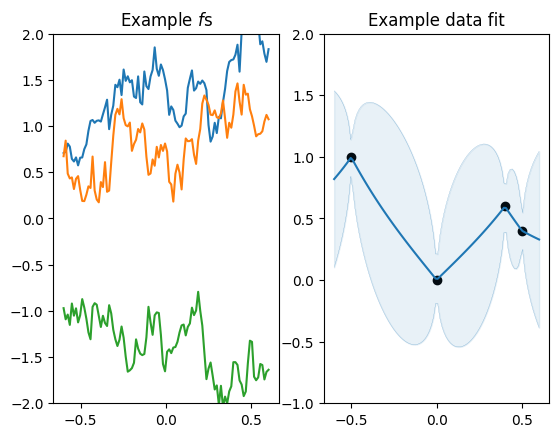

In [3]:
plot_kernel(gpflow.kernels.Matern12())